In [4]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from collections import defaultdict
from scipy.stats.stats import pearsonr
df = pd.read_csv("HR_comma_sep.csv")

In [2]:
# tizio = df[1469:1470]
# tizio.head()

In [5]:
salaries = df['salary'].unique()
salaries_mapping = dict(zip(salaries, range(0, len(salaries) + 1)))
df['salary_Val'] = df['salary'].map(salaries_mapping).astype(float).map(lambda x: x/2)
df_train = df.drop(['left', 'Work_accident', 'promotion_last_5years', 'salary','sales','salary_Val', 'average_montly_hours'], axis=1)

In [6]:
from sklearn import preprocessing
# Convert the DataFrame to a numpy array:
train_data = df_train.values
train_data
min_max_scaler = preprocessing.MinMaxScaler()
for k in df_train.columns:
    df_train[k] = min_max_scaler.fit_transform(df_train[k].values.astype(float).reshape(-1,1))

In [7]:
from sklearn.metrics import *
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.neighbors import kneighbors_graph # hierarchical clustering



In [12]:
connectivity = kneighbors_graph(train_data, n_neighbors=1000, include_self=False)
print(connectivity)
connectivity = 0.5 * (connectivity + connectivity.T)

  (0, 1993)	1.0
  (0, 12242)	1.0
  (0, 14869)	1.0
  (0, 829)	1.0
  (0, 658)	1.0
  (0, 12000)	1.0
  (0, 14453)	1.0
  (0, 1520)	1.0
  (0, 12658)	1.0
  (0, 242)	1.0
  (0, 14211)	1.0
  (0, 1154)	1.0
  (0, 12058)	1.0
  (0, 58)	1.0
  (0, 14954)	1.0
  (0, 10790)	1.0
  (0, 14996)	1.0
  (0, 14269)	1.0
  (0, 12100)	1.0
  (0, 12209)	1.0
  (0, 209)	1.0
  (0, 611)	1.0
  (0, 484)	1.0
  (0, 723)	1.0
  (0, 15)	1.0
  :	:
  (14998, 1503)	1.0
  (14998, 12349)	1.0
  (14998, 14941)	1.0
  (14998, 12728)	1.0
  (14998, 6854)	1.0
  (14998, 14396)	1.0
  (14998, 1489)	1.0
  (14998, 1385)	1.0
  (14998, 119)	1.0
  (14998, 12460)	1.0
  (14998, 14634)	1.0
  (14998, 12290)	1.0
  (14998, 1185)	1.0
  (14998, 14530)	1.0
  (14998, 460)	1.0
  (14998, 42)	1.0
  (14998, 728)	1.0
  (14998, 423)	1.0
  (14998, 558)	1.0
  (14998, 12121)	1.0
  (14998, 1594)	1.0
  (14998, 14332)	1.0
  (14998, 290)	1.0
  (14998, 185)	1.0
  (14998, 319)	1.0


In [9]:
connectivity

<14999x14999 sparse matrix of type '<class 'numpy.float64'>'
	with 18647502 stored elements in Compressed Sparse Row format>

In [13]:
print ('ward')
ward = AgglomerativeClustering(n_clusters=8, linkage='ward', affinity='euclidean',
                                   connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward
labels {0: 2774, 1: 4302, 2: 2312, 3: 1199, 4: 214, 5: 921, 6: 1479, 7: 1798}
silhouette 0.3728285888396739


['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company']


/home/lucio/cartelleUsateDaiProgrammi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


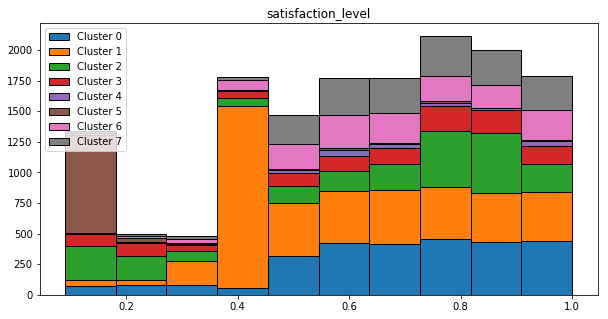

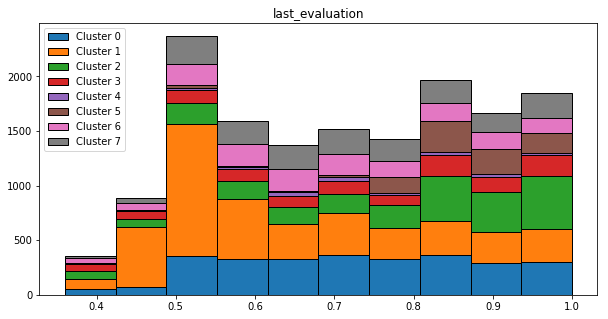

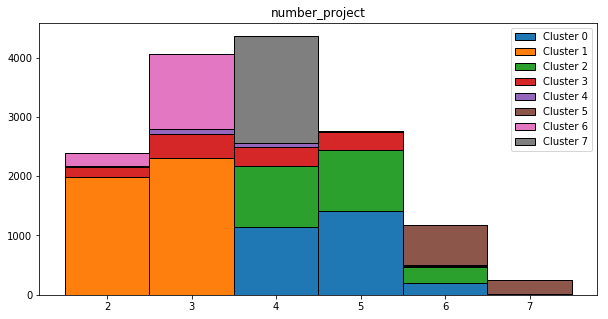

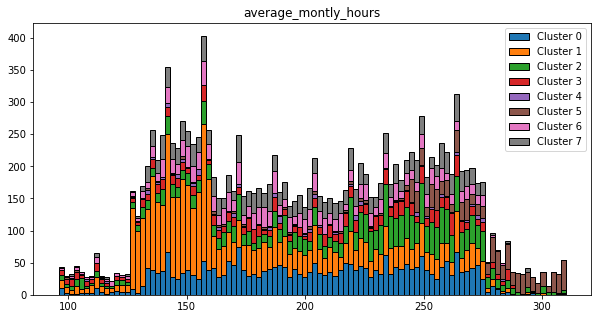

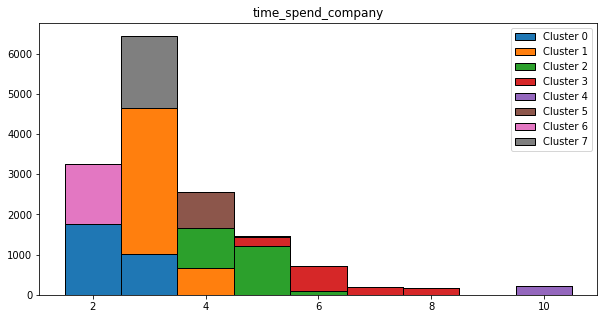

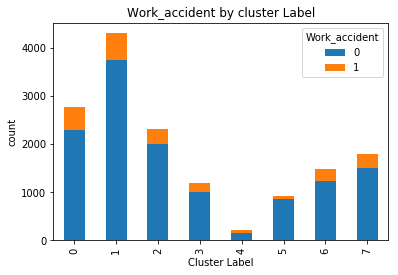

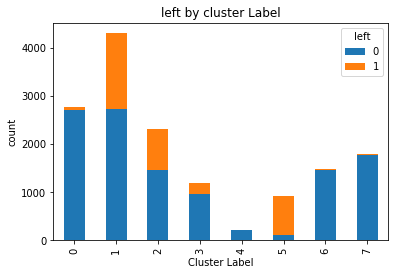

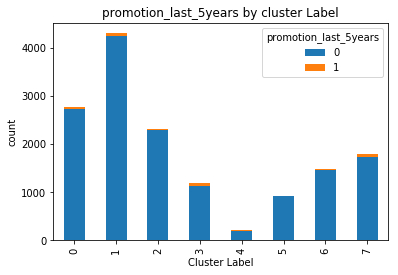

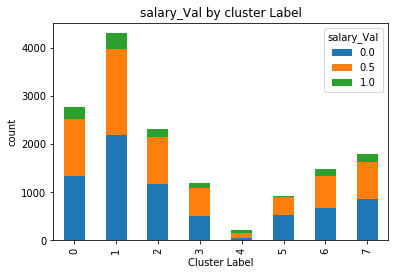

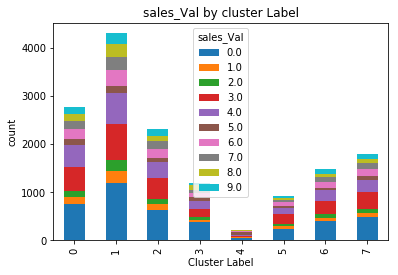

In [8]:
fai_istogrammi (df, ward.labels_)

In [14]:
print ('ward without connectivity matrix')
ward = AgglomerativeClustering(n_clusters=8, linkage='ward', affinity='euclidean',)
                                   #connectivity=connectivity)
ward.fit(train_data)

hist, bins = np.histogram(ward.labels_, bins=range(0, len(set(ward.labels_)) + 1))
print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, ward.labels_))

ward without connectivity matrix
labels {0: 4302, 1: 1199, 2: 2312, 3: 2942, 4: 214, 5: 921, 6: 1479, 7: 1630}
silhouette 0.41362257542582737


In [6]:
def fai_istogrammi (df, labels_):
    
    possible_labels = np.unique(labels_)
    
    df_copy = df.copy()
    df_copy['Labels'] = labels_
    df_statistics_complete = df_copy

    #sales mapping to numeric
    depts = df['sales'].unique()
    dept_mapping = dict(zip(depts, range(0, len(depts) + 1)))
    df_statistics_complete['sales_Val'] = df['sales'].map(dept_mapping).astype(float)

    df_statistics = df_statistics_complete.drop(['sales','salary'], axis=1)
    
    cols_used_in_training = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company']
    cols_not_used = ['Work_accident', 'left', 'promotion_last_5years', 'salary_Val', 'sales_Val']

    cols = np.array(cols_used_in_training)
    df_matrix = np.empty((len(possible_labels),len(cols)), dtype=pd.Series)
    for i in range(len(possible_labels)):
        label = i
        row = df_statistics[df_statistics['Labels'] == label]
        for j in range(0,len(cols)):
            col = cols[j]
            df_matrix[i,j] = row[col]

    labels = ["Cluster " + str(i) for i in range(len(possible_labels))]

    print (cols)

    for i in range(0,len(cols)):
        plt.figure(figsize = (10,5))
        if i in [2,4]:
            d = np.diff(np.unique(df_statistics[cols[i]])).min()
            left_bin = df_statistics[cols[i]].min() - d/2
            right_bin = df_statistics[cols[i]].max() + d/2
            plt.hist(df_matrix[:,i], stacked=True, edgecolor='black', label=labels, bins=np.arange(left_bin, right_bin+d, d),)
        elif i==3:
            plt.hist(df_matrix[:,i], stacked=True, edgecolor='black', label=labels, bins=100)
        else:
            plt.hist(df_matrix[:,i], stacked=True, edgecolor='black', label=labels, )
        plt.title(cols[i])
        plt.legend()
        plt.show()
        
    cols = np.array(cols_not_used)

    for col in cols:

        xt = pd.crosstab(df_statistics['Labels'],df_statistics[col])

        plt.figure(figsize=(30,15))

        xt.plot(kind='bar', stacked=True, title='%s by cluster Label' % (col,))
        plt.xlabel('Cluster Label')
        plt.ylabel('count')
        plt.show()



['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company']


/home/lucio/cartelleUsateDaiProgrammi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


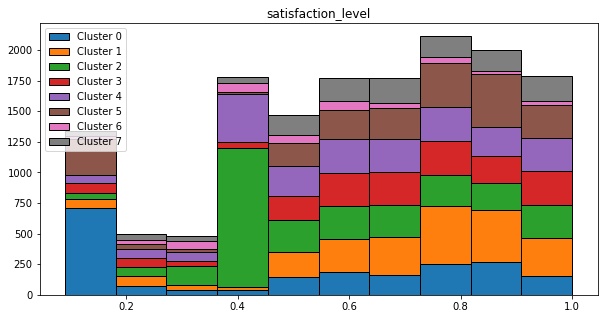

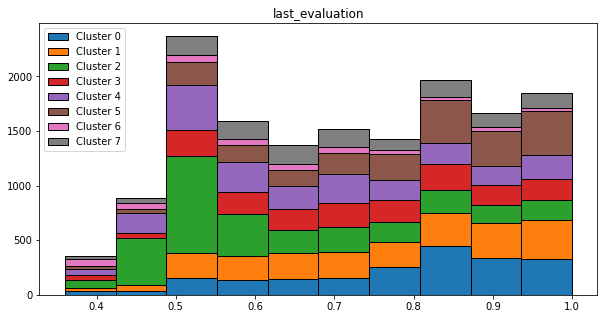

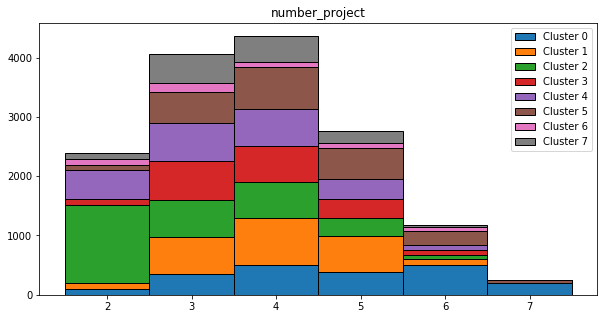

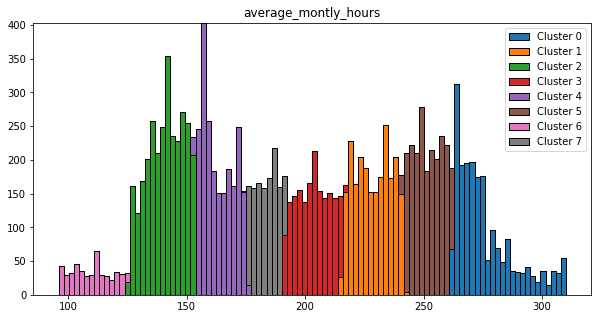

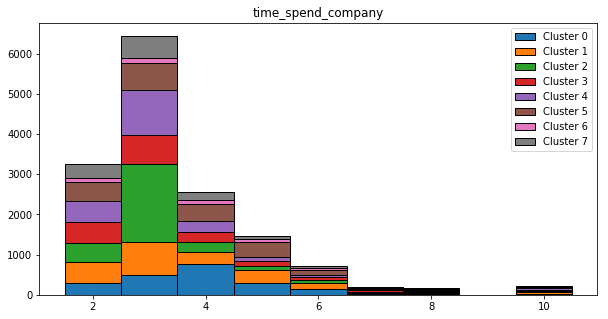

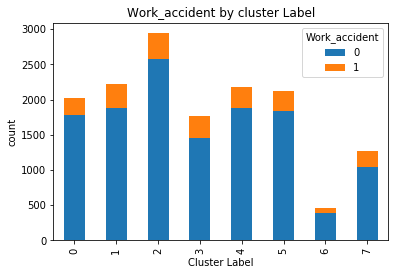

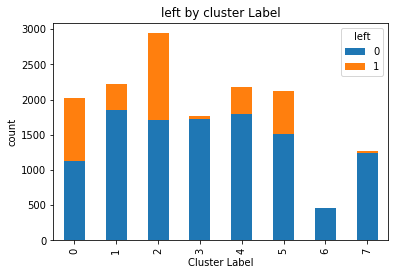

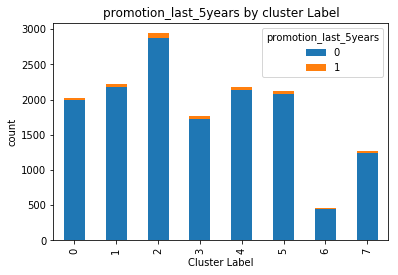

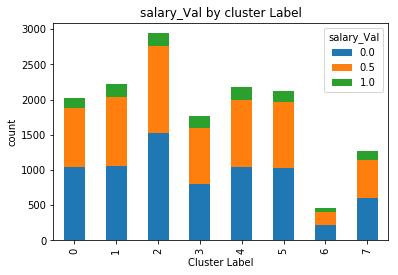

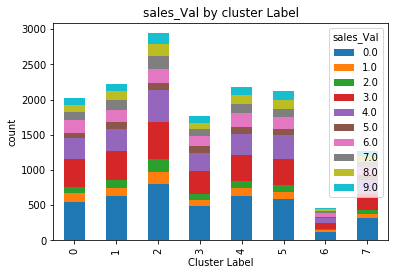

In [18]:
fai_istogrammi (df, ward.labels_)

In [11]:
print ('average linkage with connectivity matrix')
average_linkage = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='euclidean',
                                              connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage with connectivity matrix
labels {0: 13802, 1: 133, 2: 349, 3: 219, 4: 196, 5: 128, 6: 142, 7: 30}
silhouette -0.44012968167


In [19]:
print ('average linkage')
average_linkage = AgglomerativeClustering(n_clusters=8, linkage='average', affinity='euclidean',)
                                              #connectivity=connectivity)
average_linkage.fit(train_data)

hist, bins = np.histogram(average_linkage.labels_, 
                          bins=range(0, len(set(average_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, average_linkage.labels_))

average linkage
labels {0: 3091, 1: 3931, 2: 3195, 3: 477, 4: 494, 5: 2001, 6: 1614, 7: 196}
silhouette 0.460982160548


['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company']


/home/lucio/cartelleUsateDaiProgrammi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


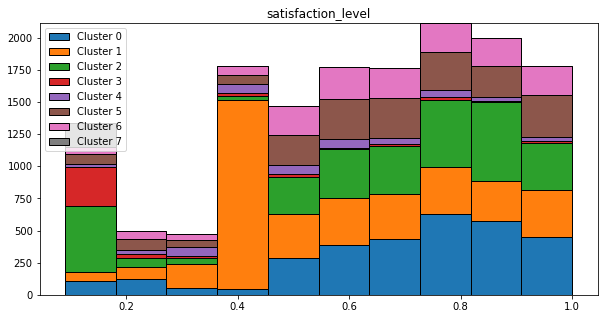

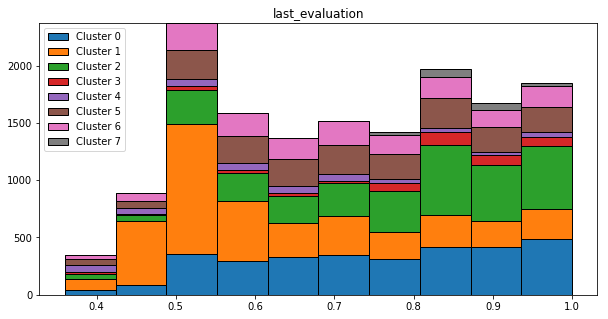

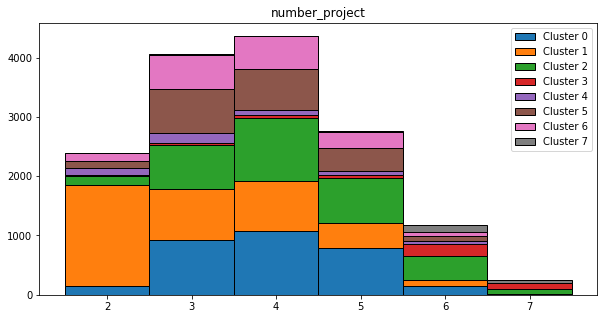

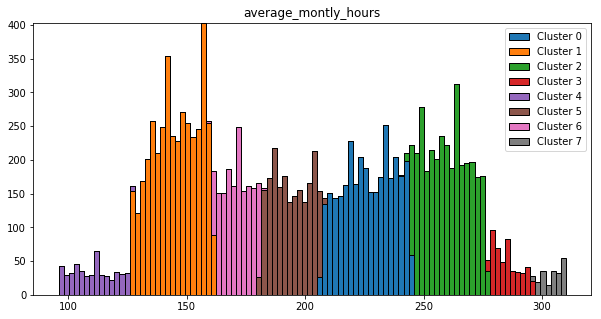

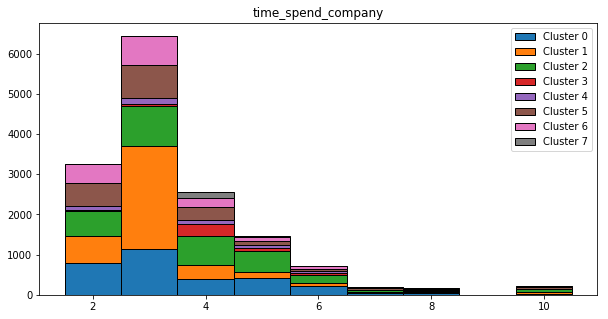

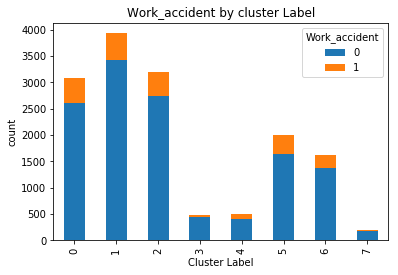

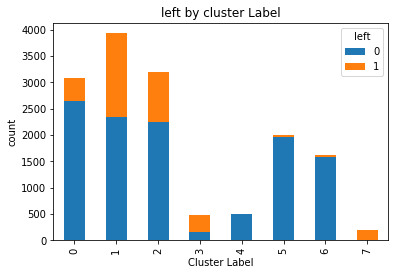

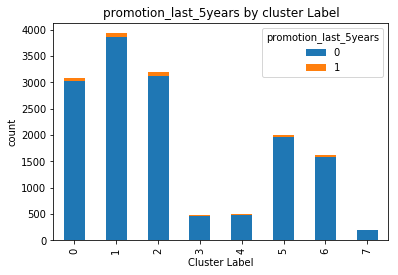

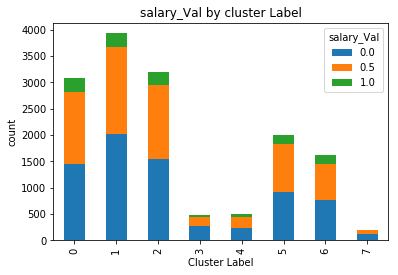

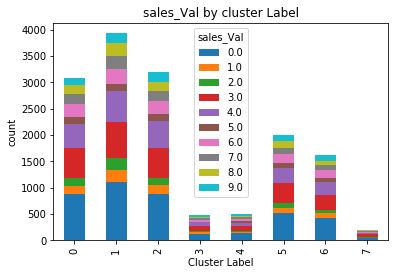

In [20]:
fai_istogrammi (df, average_linkage.labels_)

In [21]:
print ('complete linkage')
complete_linkage = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='manhattan',)
                                         #     connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage
labels {0: 2793, 1: 790, 2: 2478, 3: 1721, 4: 1926, 5: 2095, 6: 347, 7: 2849}
silhouette 0.486002789932


['satisfaction_level' 'last_evaluation' 'number_project'
 'average_montly_hours' 'time_spend_company']


/home/lucio/cartelleUsateDaiProgrammi/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


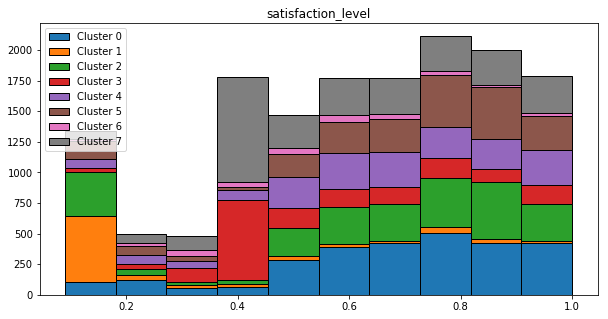

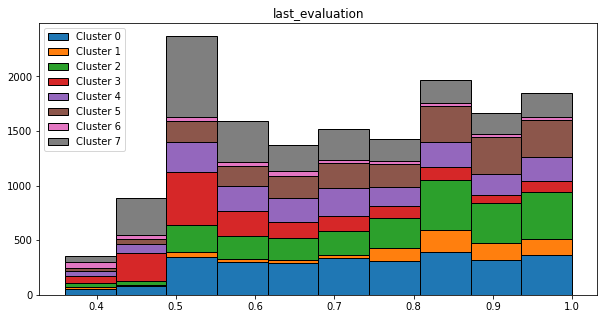

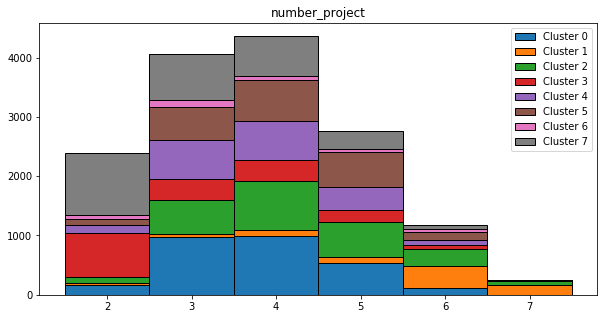

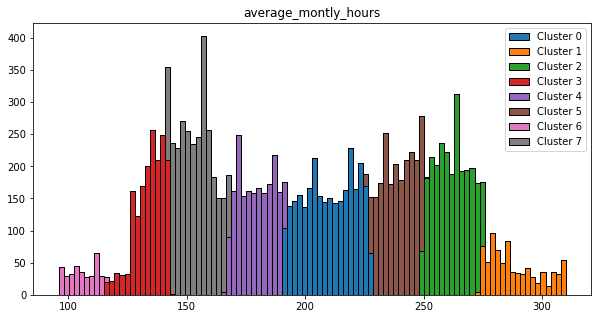

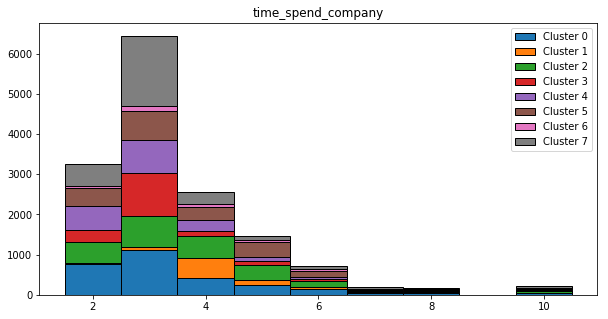

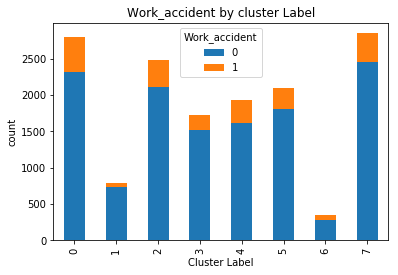

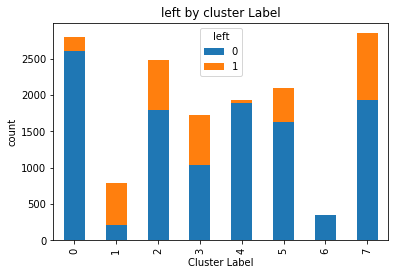

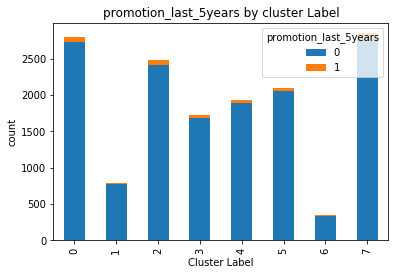

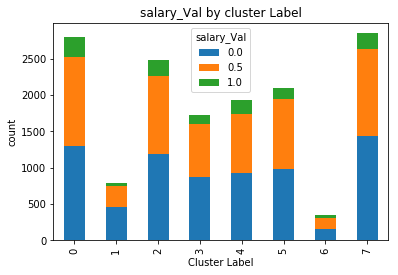

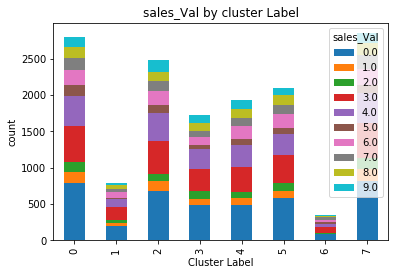

In [22]:
fai_istogrammi (df, complete_linkage.labels_)

In [ ]:
print ('complete linkage with connectivity matrix')
complete_linkage = AgglomerativeClustering(n_clusters=8, linkage='complete', affinity='l1',
                                              connectivity=connectivity)
complete_linkage.fit(train_data)
hist, bins = np.histogram(complete_linkage.labels_, 
                          bins=range(0, len(set(complete_linkage.labels_)) + 1))

print ('labels', dict(zip(bins, hist)))
print ('silhouette', silhouette_score(train_data, complete_linkage.labels_))

complete linkage with connectivity matrix
labels {0: 241, 1: 13860, 2: 174, 3: 170, 4: 274, 5: 83, 6: 135, 7: 62}


In [5]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram

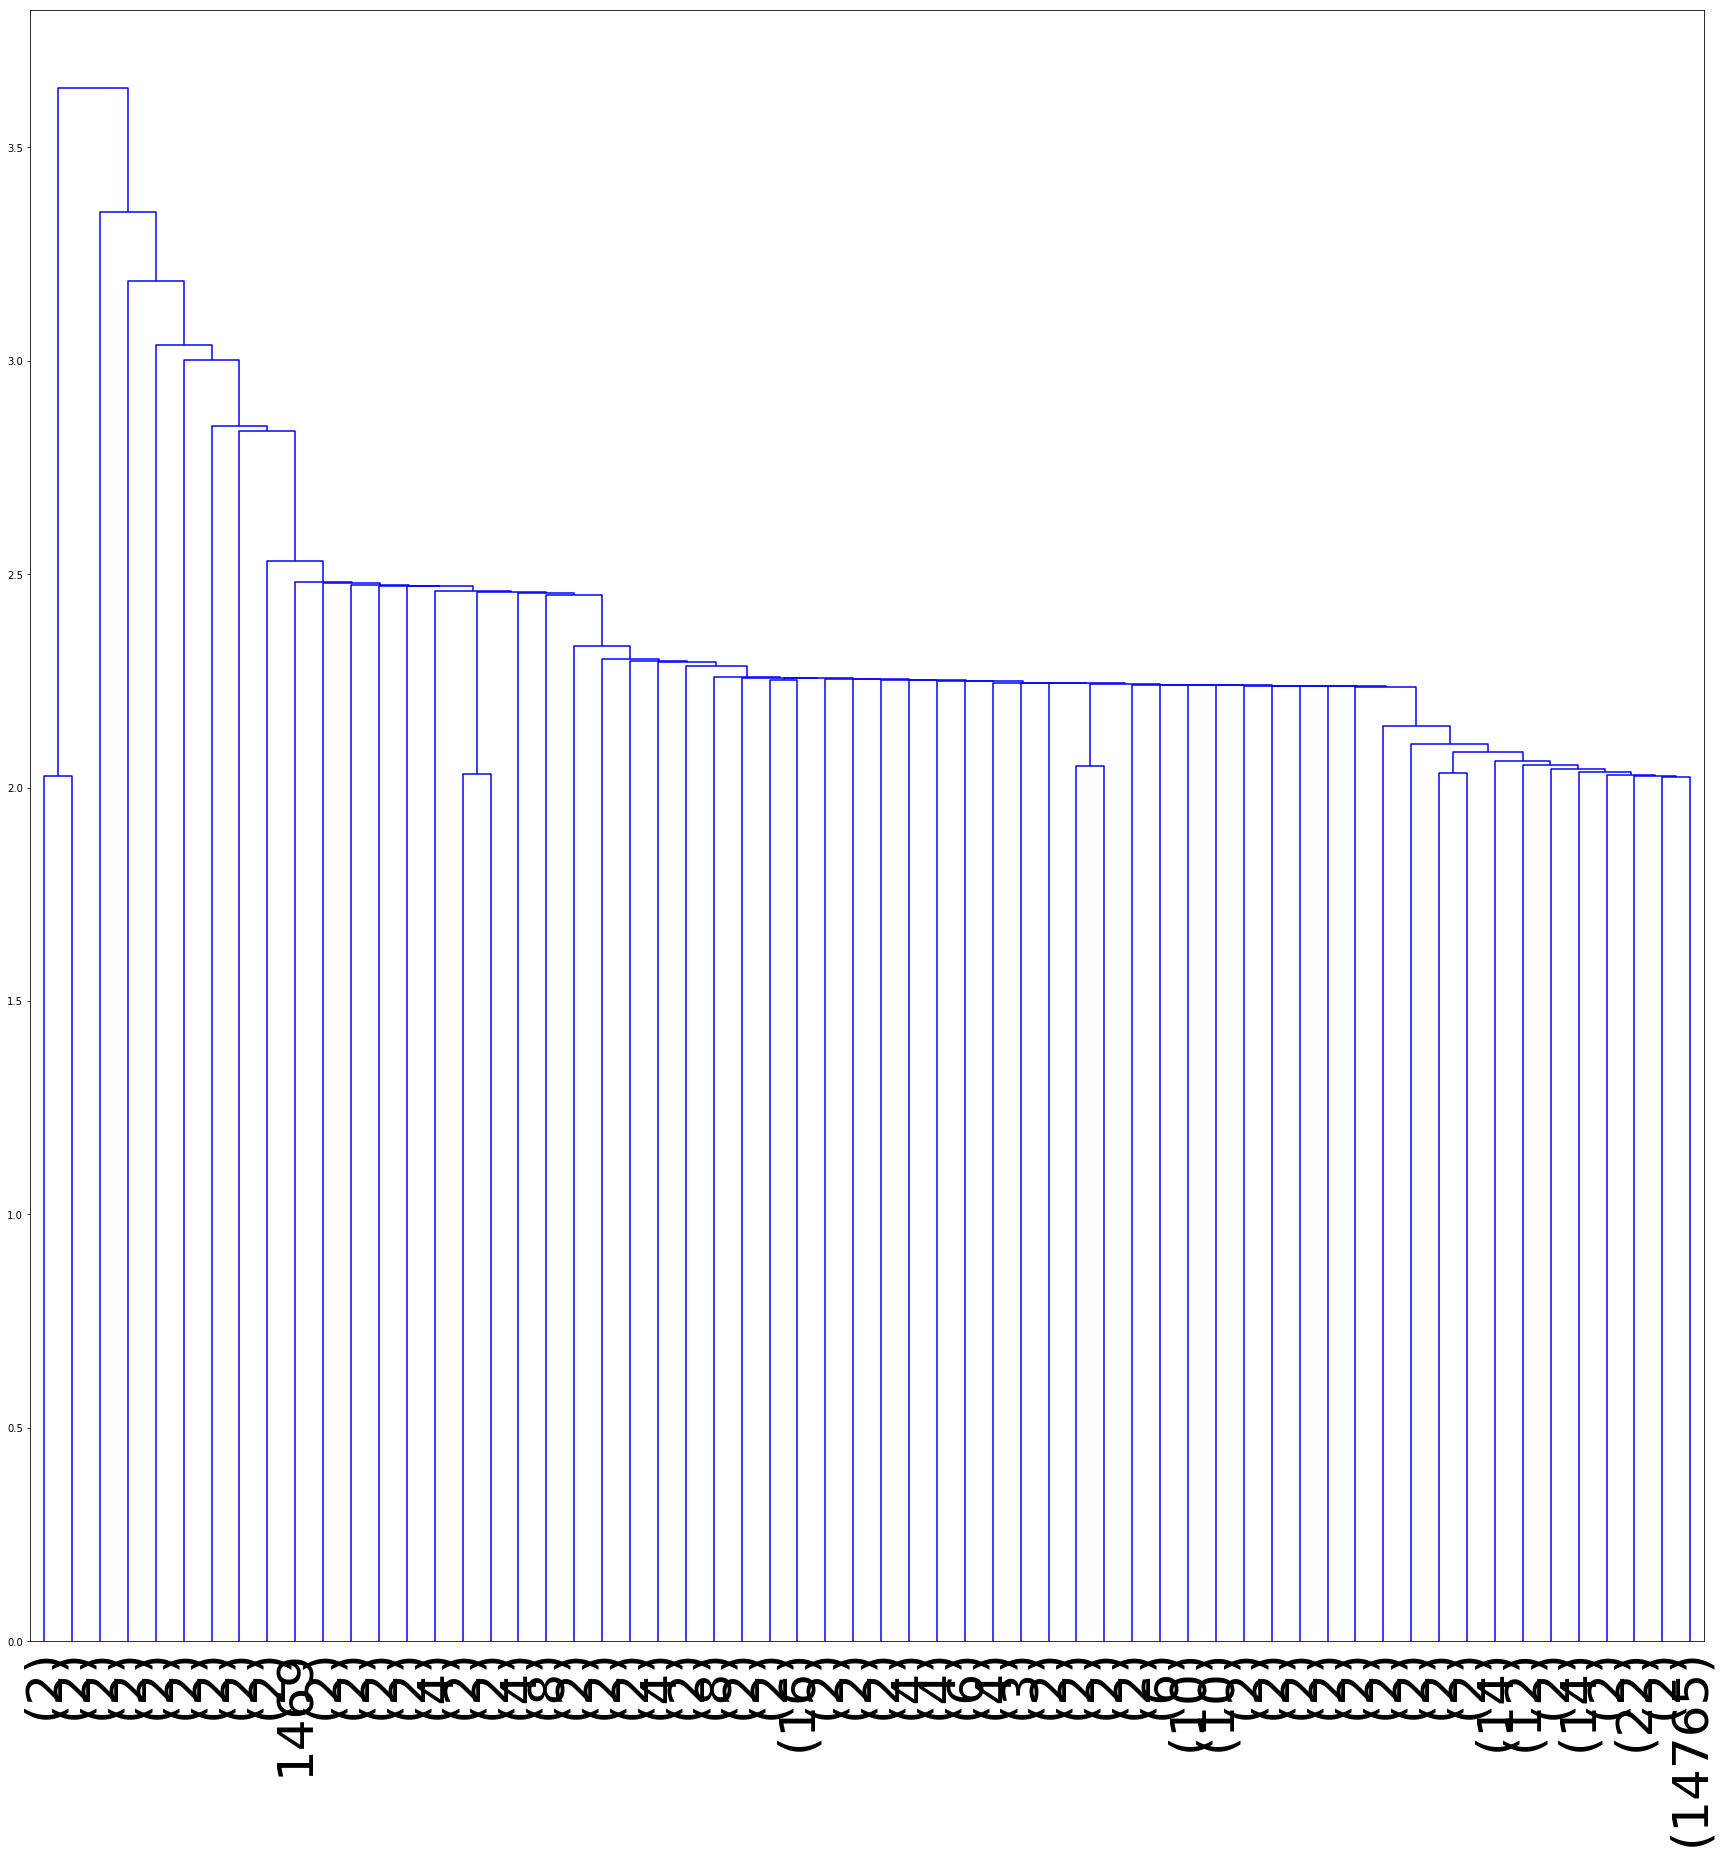

In [14]:
# single linkage and dendogram using scipy
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1,1,1)

res = dendrogram(data_link, color_threshold =0.15, truncate_mode='lastp', p=60, ax=ax)
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(50) 
#res.get_figure().savefig("box_1.png",dpi=500)

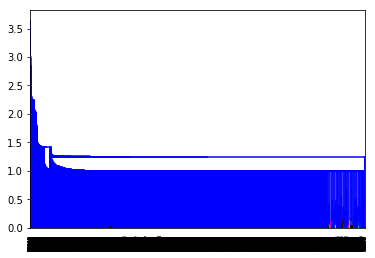

In [15]:
res = dendrogram(data_link, color_threshold =0.19)

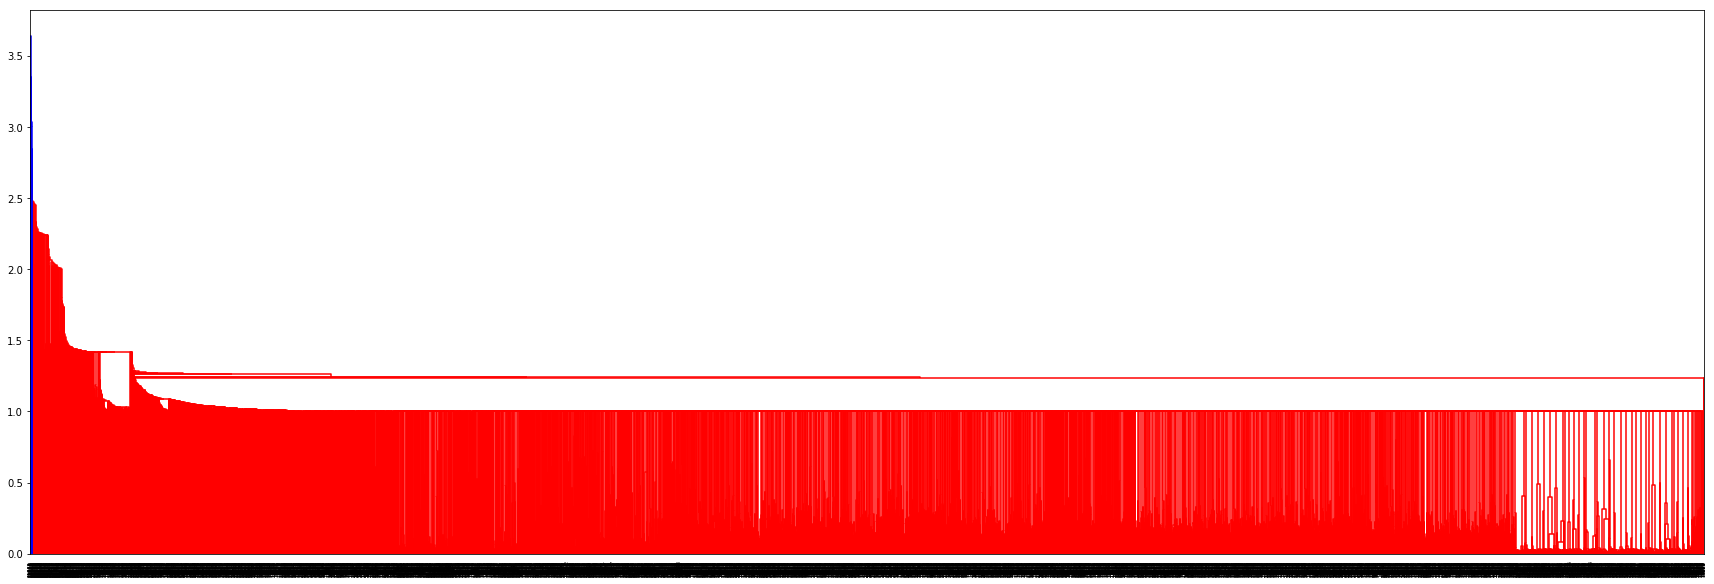

In [23]:
# single linkage and dendogram using scipy
# dendogram of 100 samples
data_dist = pdist(train_data, metric='euclidean')
data_link = linkage(data_dist, method='single', metric='euclidean')
plt.figure(figsize=(30,10))

res=dendrogram(data_link)


In [7]:
data_dist = pdist(train_data, metric='euclidean')

In [19]:
import matplotlib as mpl

def formatter_fn (x, pos):
    return ""

ward_data_link = linkage(data_dist, method='ward', metric='euclidean')



In [21]:
complete_data_link = linkage(data_dist, method='complete', metric='euclidean')

In [23]:
avg_data_link = linkage(data_dist, method='average', metric='euclidean')

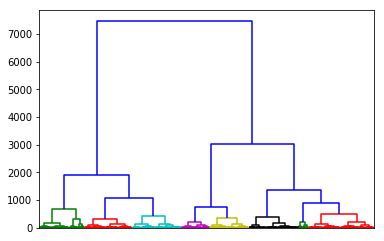

In [20]:
# ward linkage and dendogram using scipy
res = dendrogram(ward_data_link, color_threshold=750)

ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter( formatter_fn ))

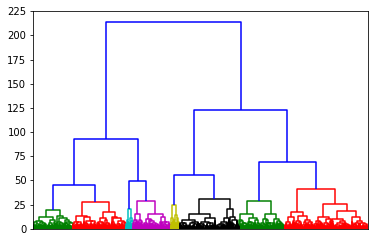

In [24]:
# complete linkage and dendogram using scipy
res = dendrogram(complete_data_link, color_threshold=44)
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter( formatter_fn ))

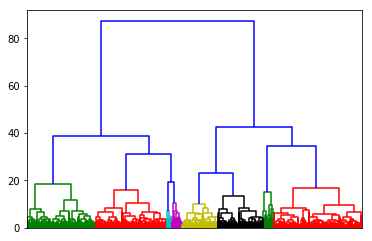

In [25]:
# avg linkage and dendogram using scipy

res = dendrogram(avg_data_link, color_threshold=19)
ax = plt.gca()
ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter( formatter_fn ))

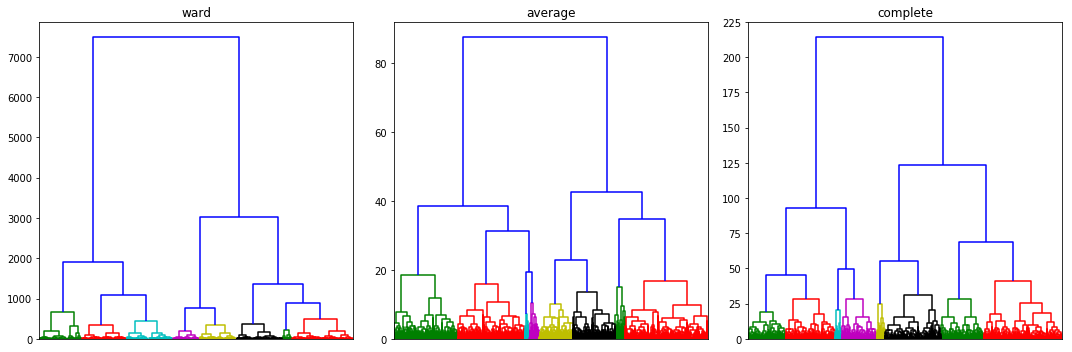

In [34]:
#three dendograms in the same figure

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

for i, ax in enumerate(axes):
    if i==0:
        # ward linkage and dendogram using scipy
        res = dendrogram(ward_data_link, color_threshold=750, ax=ax)
        ax.set_title ("ward")
    if i==1:
        # avg linkage and dendogram using scipy
        res = dendrogram(avg_data_link, color_threshold=19, ax=ax)
        ax.set_title ("average")
    if i==2:
        res = dendrogram(complete_data_link, color_threshold=44, ax=ax)
        ax.set_title ("complete")
    
    ax.xaxis.set_major_formatter(mpl.ticker.FuncFormatter( formatter_fn ))

plt.tight_layout()
